The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [93]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [94]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np


# Read nobel.csv into DataFrame
nobel = pd.read_csv("data/nobel.csv")


# Count values for each `sex` to determine the gender with the most entries in the nobel df
gender_counts = pd.value_counts(nobel["sex"])
top_gender = gender_counts.index[0]

#Print top_gender
print("The top gender is " + str(top_gender))

# Count values for each `birth_country` to determine the gender with the most entries in the nobel df
country_counts = pd.value_counts(nobel["birth_country"])
top_country = country_counts.index[0]

print("The top country is " + str(top_country))


# Create a column in the nobel table for storing the decade of each award
nobel["decade"] = (nobel.year//10)*10

# Count all the Nobel Prizes in each decade
all_decade = nobel["decade"].value_counts().sort_index()

# Count the US Nobel laureates in each decade
us_decade = nobel["decade"][nobel["birth_country"]=='United States of America'].value_counts().sort_index()

# Add a proportion column to `us_decade` containing the proportion of US laureates each decade
us_decade["prop"] = us_decade / all_decade

# Rank `us_decade` by `prop`
usa_decade_ranked = us_decade["prop"].sort_values(ascending=False)

# Select the No.1 decade from the decade index column
max_decade_usa = usa_decade_ranked.index[0]

print("The US performed best in the " + str(max_decade_usa) + "'s")


# Group the female Nobel laureates by decade and category
fem_dec_cat = nobel[["decade", "category"]][nobel["sex"]=='Female'].value_counts().sort_index()

# Group all Nobel laureates by decade and category
all_dec_cat = nobel[["decade", "category"]].value_counts().sort_index()

# Calculate the proportion of female laureates for each decade and category combination
proportion_female = fem_dec_cat / all_dec_cat

# Find the combination with the highest proportion of female laureates
max_combination = proportion_female.idxmax()

# Store the combination as a dictionary
max_female_dict = {max_combination[0]: max_combination[1]}

print("The decade and Nobel Prize category combination with the highest proportion of female laureates is:", max_female_dict)


# Subset the `nobel` df for female laureates
fem_nobel = nobel[nobel["sex"]=='Female'].sort_values("year")

# Create variables to store the first female laureate's name and category
first_woman_name = fem_nobel["full_name"].iloc[0]
first_woman_category = fem_nobel["category"].iloc[0]

print(first_woman_name + ", the first woman to recieve a Nobel Prize, recieved it in " + first_woman_category + '.')


# Count how many Nobel Prizes each laureate has won
prizes_count = nobel["full_name"].value_counts()

# Subset the `prizes_count` series by filtering for repeat winners
repeat_list = prizes_count[prizes_count >= 2].index.tolist()

print("The following laureates have received multiple prizes: " + str(repeat_list))

The top gender is Male
The top country is United States of America
The US performed best in the 2000's
The decade and Nobel Prize category combination with the highest proportion of female laureates is: {2020: 'Literature'}
Marie Curie, née Sklodowska, the first woman to recieve a Nobel Prize, recieved it in Physics.
The following laureates have received multiple prizes: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


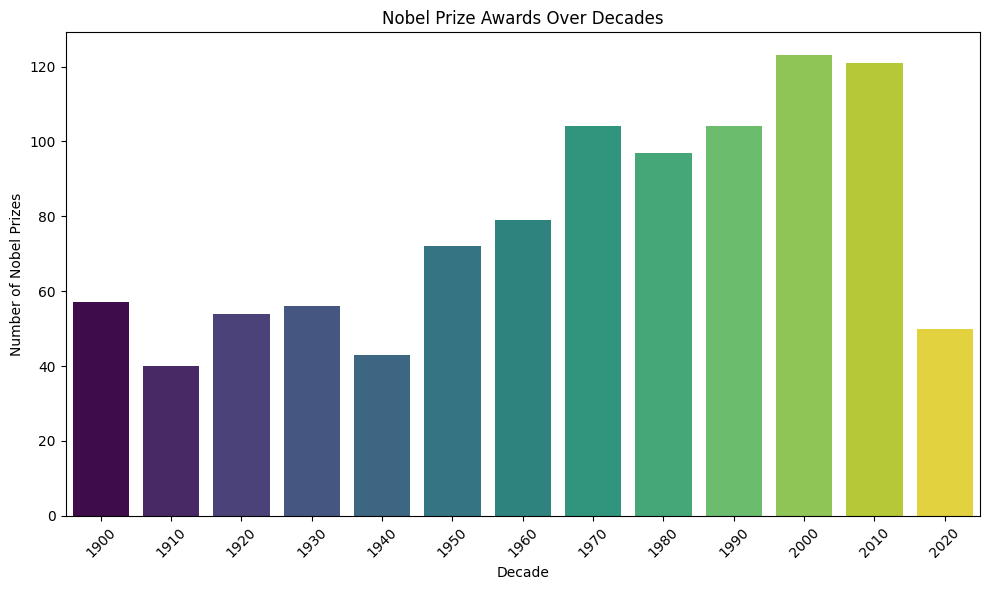

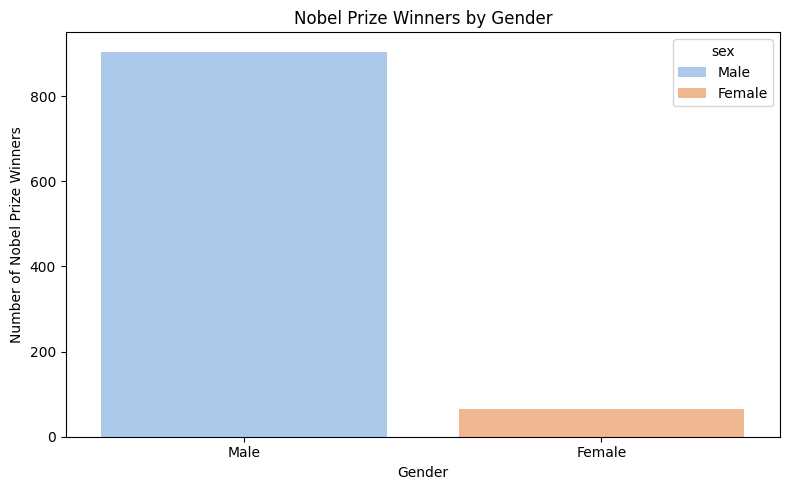

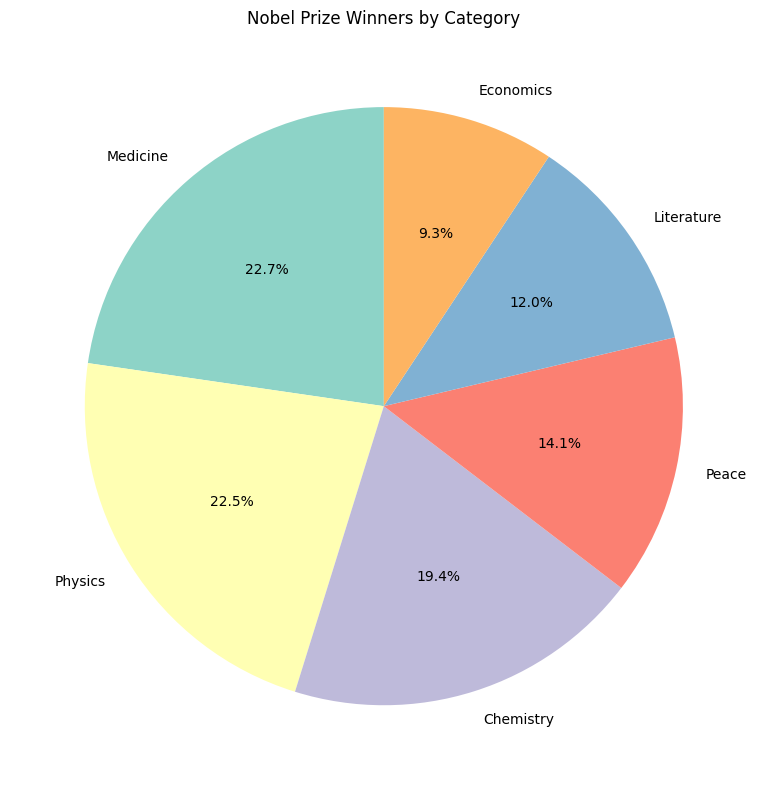

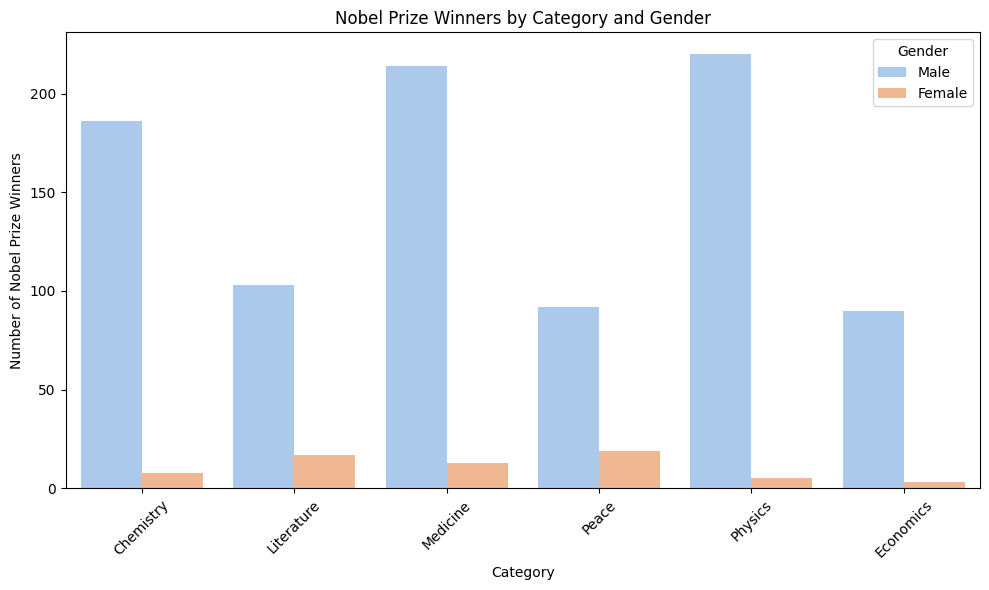

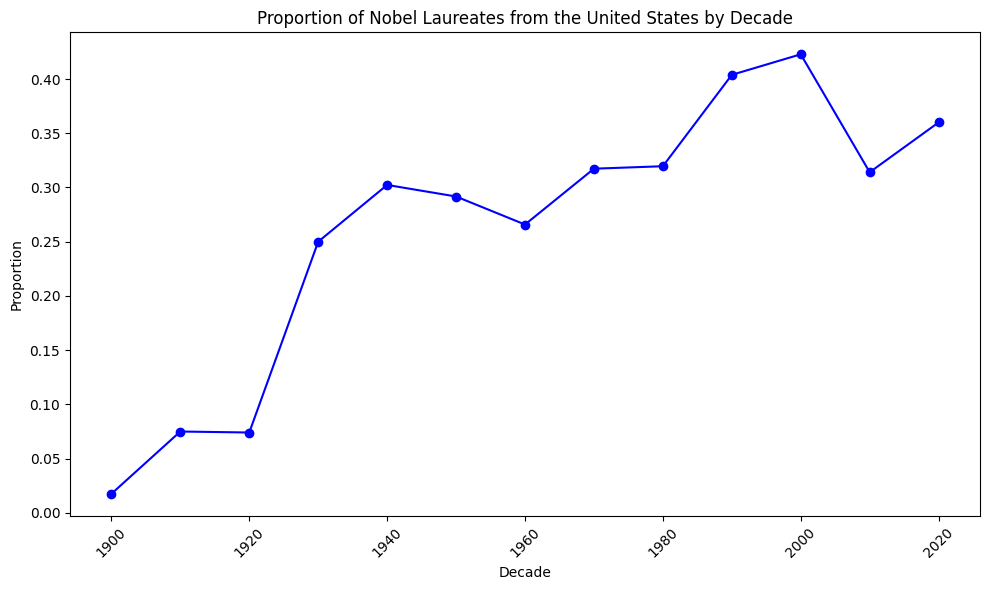

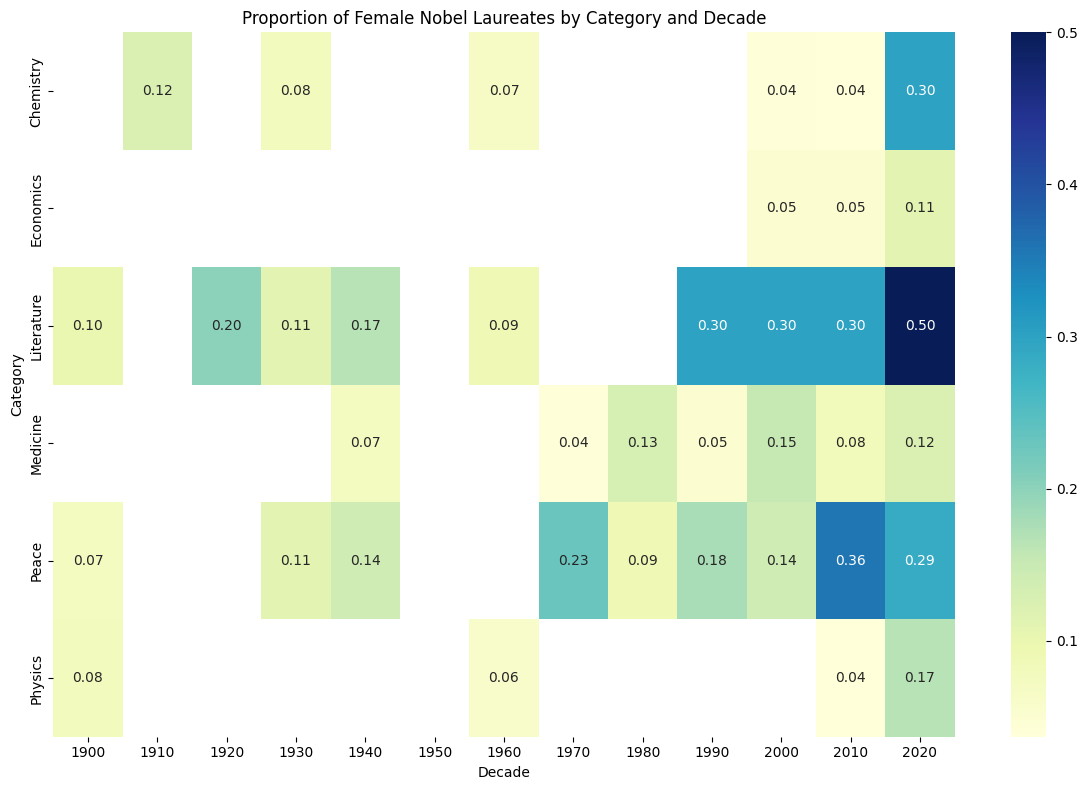

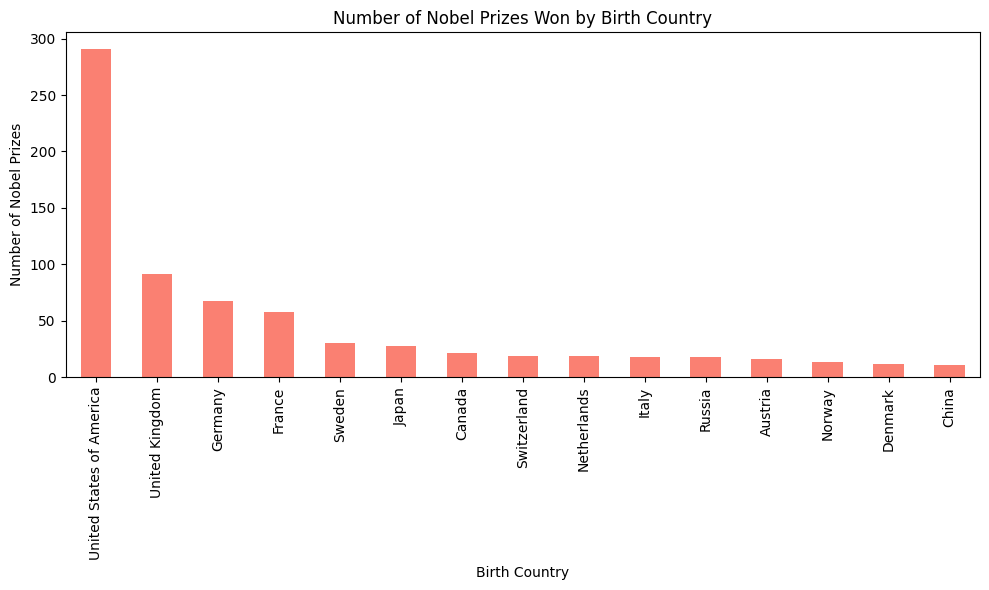

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Nobel Prize dataset
nobel = pd.read_csv("nobel.csv")

# Create a column for storing the decade of each award
nobel["decade"] = (nobel["year"] // 10) * 10

# Subset the Nobel Prize dataset for US-born Nobel laureates
us_nobel = nobel[nobel["birth_country"]=='United States of America']

# Time Series Plot of Nobel Prize Awards Over Decades
plt.figure(figsize=(10, 6))
sns.countplot(data=nobel, x="decade", hue="decade", palette="viridis", legend=False)
plt.title("Nobel Prize Awards Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Nobel Prizes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot of Nobel Prize Winners by Gender
plt.figure(figsize=(8, 5))
sns.countplot(data=nobel, x="sex", hue="sex", palette="pastel")
plt.title("Nobel Prize Winners by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Nobel Prize Winners")
plt.tight_layout()
plt.show()

# Pie Chart of Nobel Prize Winners by Category
plt.figure(figsize=(8, 8))
nobel["category"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(nobel["category"].unique())))
plt.title("Nobel Prize Winners by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Stacked Bar Plot of Nobel Prize Winners by Category and Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=nobel, x="category", hue="sex", palette="pastel")
plt.title("Nobel Prize Winners by Category and Gender")
plt.xlabel("Category")
plt.ylabel("Number of Nobel Prize Winners")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Calculate the total number of Nobel Laureates for each decade
total_laureates_by_decade = nobel["decade"].value_counts().sort_index()

# Calculate the number of US Nobel Laureates for each decade
us_laureates_by_decade = us_nobel["decade"].value_counts().sort_index()

# Calculate the proportion of US Nobel Laureates relative to the total for each decade
us_proportion = us_laureates_by_decade / total_laureates_by_decade

# Plot the proportion of US Nobel Laureates over time
plt.figure(figsize=(10, 6))
us_proportion.plot(kind="line", marker="o", color="b")
plt.title("Proportion of Nobel Laureates from the United States by Decade")
plt.xlabel("Decade")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Heatmap of Proportion of Female Nobel Laureates by Category and Decade
plt.figure(figsize=(12, 8))
female_nobel = nobel[nobel["sex"] == "Female"]
female_proportion = female_nobel.groupby(["decade", "category"]).size() / nobel.groupby(["decade", "category"]).size()
female_proportion = female_proportion.reset_index(name="proportion")
female_proportion_pivot = female_proportion.pivot(index="category", columns="decade", values="proportion")
sns.heatmap(female_proportion_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Proportion of Female Nobel Laureates by Category and Decade")
plt.xlabel("Decade")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Scatter Plot of Birth Country vs. Number of Nobel Prizes Won
plt.figure(figsize=(10, 6))
nobel_country_counts = nobel["birth_country"].value_counts()
nobel_country_counts = nobel_country_counts[nobel_country_counts > 10]  # Filter countries with fewer laureates for better visualization
nobel_country_counts.plot(kind="bar", color="salmon")
plt.title("Number of Nobel Prizes Won by Birth Country")
plt.xlabel("Birth Country")
plt.ylabel("Number of Nobel Prizes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()